<a href="https://colab.research.google.com/github/shivakumar-2555/ML-practical/blob/main/exp7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


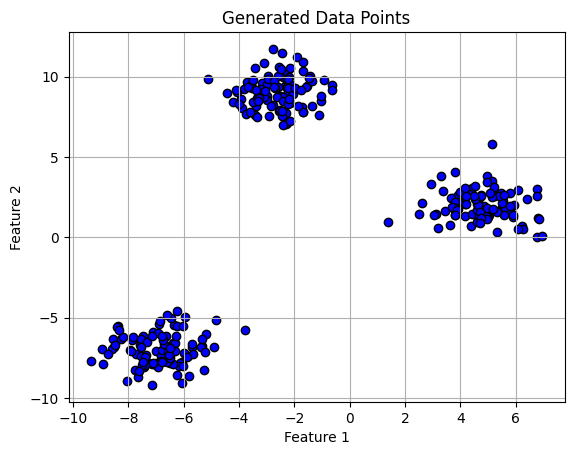

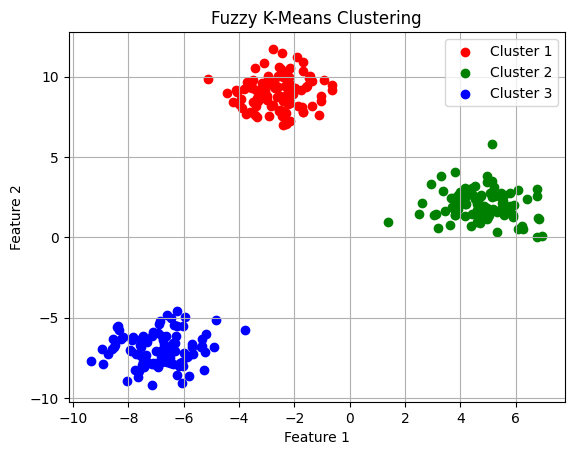

Membership values for the first data point: [0.00242902 0.00305844 0.99451254]

Fuzzy Partition Coefficient (FPC): 0.9579229921304121


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz # This line imports the 'skfuzzy' package and assigns it the alias 'fuzz'.

n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k')
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

X_transposed = np.transpose(X)

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

cluster_membership = np.argmax(u, axis=0)

colors = ['red', 'green', 'blue']
for i in range(n_clusters):
    plt.scatter(X[cluster_membership == i, 0], X[cluster_membership == i, 1], color=colors[i], label=f"Cluster {i+1}")

plt.title("Fuzzy K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

print("Membership values for the first data point:", u[:, 0])

print("\nFuzzy Partition Coefficient (FPC):", fpc)